## Données issues du DataScience Challenge 1 :
### 64 553 modèles de voitures et leur 190 caractéristiques techniques.
    
## Objectif : 
* Quelle est la catégorie de voiture la plus fréquente ?
* Quelles caractéristiques techniques peut-on utiliser pour faire de la classification ?
* Quelle est l'efficacité de classification que vous pouvez atteindre ?

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
pd.set_option("display.max_rows",250)
pd.set_option("display.max_columns",250)
#Classifiers
from sklearn.linear_model import Perceptron
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression as LR
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.linear_model import Perceptron as PPN
from sklearn.metrics import average_precision_score


### Import et mise en forme des données

In [4]:
dataset = pd.read_csv("carsdata_features.csv")
dataset.head()

,NO_ABS,NO_accoudoir_central,NO_airbag_conducteur,NO_airbag_lateraux,NO_airbag_passager,NO_airbag_tete_rideau,alesage_mm,course_piston_mm,NO_allumage_auto_feux,NO_antipatinage,NO_appuis_tete_arriere,NO_assistant_freinage,NO_banquette_arriere_rabattable,NO_blocage_differentiel,NO_bluetooth,capacite_charge_max_kg,capacite_moteur_cc,NO_capteur_stationnement,NO_capteur_temp_liquide_refroidissement,LPG_carburant,bio_ethanol_carburant,diesel_carburant,natural_gas_carburant,catalyseur_onregular,catalyseur_part_filter,catalyseur_egular,No_clim_bizone,NO_climatisation,NO_commande_audio_volant,compteur_jours,conso_extra_urbaine_l_par_100km,conso_extra_urbaine_km_par_l,conso_mixte_l_par_100km,conso_mixte_km_par_l,conso_urbaine_l_par_100km,conso_urbaine_km_par_l,couple_max,couple_max_tr_min,nb_cylindres,cylindres_boxer,cylindres_en_V,cylindres_en_W,date_fin,date_sortie,NO_thermometre_exterieur,NO_direction_assistee,NO_eclairage_miroir_maquillage,NO_eclairage_tdb_reglable,NO_electro_stabilisateur_prog,emission_co2_g_par_km,empattement,intervale_km_entretien,intervale_annees_entretien,NO_essuie_glace_auto,NO_fermeture_portes_centrallisee,NO_feux_anti_brouillard,NO_feux_circulation_diurnes,freins_arriere_type_trommels,freins_arriere_type_ventilated_disc,freins_arriere_diametre_disc,freins_avant_type_trommels,freins_avant_type_ventilated_disc,freins_avant_diametre_disc,duree_garantie_carroserie,garantie_generale_annees,garantie_generale_km,hauteur_mm,NO_jantes_alliage,largeur_mm,NO_lave_phares,NO_liseuse,longueur_mm,longueur_coffre_min,longueur_coffre_max,ratio_marche_arriere,masse_admissible_max,masse_max_frein_avec_remorque,masse_max_frein_sans_remorque,masse_vide,max_boule_presse,max_charge_toit,niveau_energie_B,niveau_energie_C,niveau_energie_D,niveau_energie_E,niveau_energie_F,niveau_energie_G,marque,modele,version,nombre_portes,nombre_sieges,prix,NO_ordinateur_bord,NO_panorama,NO_pare_chocs_peints,NO_peinture_metalisee,NO_phares_xenon,pneus_largeur,pneus_hauteur,pneus_type,pneus_diametre,puissance_max_kW,puissance_max_HP,puissance_max_tr_min,NO_rails_toit,rayon_virage,NO_reg_electrique_sieges,NO_reg_vitesse,NO_repartiteur_elect_freinage,reservoir_carburant,NO_retros_clignotant,NO_retros_electriques,NO_retros_electrochrome,NO_retros_ext_rabatable,NO_retros_gradation_auto,roues_motrices_avant_arriere,roues_motrices_arriere,NO_siege_chauffant,NO_siege_cuir,NO_siege_reglable_hauteur,NO_siege_reglage_lombaire,NO_siege_sport,soupapes_par_cylindre,stabilisatrice_arriere,stabilisatrice_avant,suspension_arriere_de_dion,suspension_arriere_independent_double_wishbone,suspension_arriere_independent_long_arm,suspension_independent_wishbone,suspension_arriere_multilink,suspension_arriere_rigid,suspension_arriere_semi_independant,suspension_avant_independent_McPherson,suspension_avant_independent_double_wishbone,suspension_avant_independent_long_arm,suspension_avant_independent_wishbone,suspension_avant_independent_multilink,NO_sys_alarme,NO_sys_audio,sys_carburant_indirect_injection,sys_carburant_direct_injection,sys_carburant_multipoint_injection,sys_carburant_singlepoint_injection,sys_entrainement_electric,sys_entrainement_hybrid,sys_entrainement_plugin_hybrid,NO_sys_navigation,NO_sys_stop_start,NO_tachymetre,taux_compression,NO_teledeverrouillage,NO_toit_ouvrant_glissant,tr_min_120_kmh,transmission_automatic,transmission_semi_automatic,transmission_sequential_automatic,transmission_finale,supercharger,turbocharger,twincharger,turbocharger_w_intercooler,bus,cabriolet,coupe,hatchback,mpv,pickup,sedan,stationwagon,suv_crossover,electromagnetic_synchronous_motor,valvetrain_ohc,valvetrain_ohv,permanent_magnet_synchronous_motor,NO_verre_intim_arriere,vitesse_1ere,vitesse_2eme,vitesse_3eme,vitesse_4eme,vitesse_max,NO_vitres_electriques,NO_vitres_teintees,voie_arriere,voie_avant,NO_volant_cuir,NO_volant_reglable,volume_coffre_min,volume_coffre_max,zero_100
0,0,1,0,0,0,0,86.0,86.00,1,0,0,1,0,1,1,625.0,1998.0,0,0,0,0,0,0,0,0,1,1,0,0,1,7.9,12.7,10.1,9.9,13.8

In [5]:
# Certaines colonnes avec des cases non renseignées
dataset.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64553 entries, 0 to 64552
Data columns (total 190 columns):
NO_ABS                                            64553 non-null int64
NO_accoudoir_central                              64553 non-null int64
NO_airbag_conducteur                              64553 non-null int64
NO_airbag_lateraux                                64553 non-null int64
NO_airbag_passager                                64553 non-null int64
NO_airbag_tete_rideau                             64553 non-null int64
alesage_mm                                        63116 non-null float64
course_piston_mm                                  63116 non-null float64
NO_allumage_auto_feux                             64553 non-null int64
NO_antipatinage                                   64553 non-null int64
NO_appuis_tete_arriere                            64553 non-null int64
NO_assistant_freinage                             64553 non-null int64
NO_banquette_arriere_rabattable   

In [6]:
colnames = dataset.columns.values
colnames

array(['NO_ABS', 'NO_accoudoir_central', 'NO_airbag_conducteur',
       'NO_airbag_lateraux', 'NO_airbag_passager', 'NO_airbag_tete_rideau',
       'alesage_mm', 'course_piston_mm', 'NO_allumage_auto_feux',
       'NO_antipatinage', 'NO_appuis_tete_arriere',
       'NO_assistant_freinage', 'NO_banquette_arriere_rabattable',
       'NO_blocage_differentiel', 'NO_bluetooth', 'capacite_charge_max_kg',
       'capacite_moteur_cc', 'NO_capteur_stationnement',
       'NO_capteur_temp_liquide_refroidissement', 'LPG_carburant',
       'bio_ethanol_carburant', 'diesel_carburant',
       'natural_gas_carburant', 'catalyseur_onregular',
       'catalyseur_part_filter', 'catalyseur_egular', 'No_clim_bizone',
       'NO_climatisation', 'NO_commande_audio_volant', 'compteur_jours',
       'conso_extra_urbaine_l_par_100km', 'conso_extra_urbaine_km_par_l',
       'conso_mixte_l_par_100km', 'conso_mixte_km_par_l',
       'conso_urbaine_l_par_100km', 'conso_urbaine_km_par_l', 'couple_max',
       'coupl

* Retirer les colonnes avec trop peu de données
* Reorganiser la DataFrame : 
    * transformer les données de type texte en numériques
    * colonnes numériques de caractéristiques
    => retirer null, normaliser
    * colonnes de résultats

In [7]:
# categories des carosseries
carClasses = ['bus', 'cabriolet', 'coupe', 'hatchback', 'mpv', 'pickup', 'sedan', 'stationwagon', 'suv_crossover']

# séparer les champs texte et numériques
str_list = [] 
for colname, colvalue in dataset.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)

num_list = dataset.columns.difference(str_list+carClasses+["pneus_type"])  

# 3 dataset 
res_dataset = pd.DataFrame(dataset, columns = carClasses)
str_dataset = pd.DataFrame(dataset,columns = str_list)
num_dataset = pd.DataFrame(dataset, columns = num_list)

In [8]:
res_dataset.head()

,bus,cabriolet,coupe,hatchback,mpv,pickup,sedan,stationwagon,suv_crossover
0,0,0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0


### Transformer le contenu des 9 colonnes en 1 seule variable catégorielle

In [9]:
res_colnames = res_dataset.columns.values 

result = []
for i in range(res_dataset.shape[0]) : 
    res = 0
    for index, col in enumerate(res_colnames) :
        res += index*res_dataset[col][i]
    result.append(res)
print result[:10]


[4, 3, 8, 3, 3, 1, 1, 8, 4, 1]


## Quelle est la catégorie de voiture la plus fréquente ?

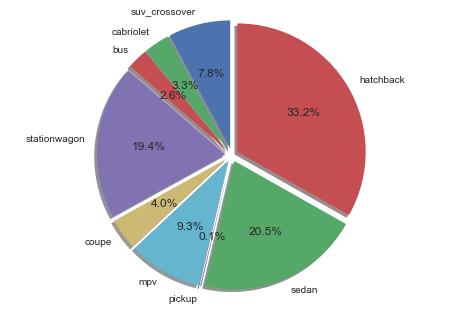

In [10]:
res_dataset["categories"] = result
compt = res_dataset["categories"].value_counts().to_dict()
compt = dict((carClasses[key], value) for (key, value) in compt.items())
name = compt.keys()
data = compt.values()

explode=(0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)
plt.pie(data, explode=explode, labels=name, autopct='%1.1f%%', startangle=90, shadow=True)
plt.axis('equal')
plt.show()

In [11]:
str_dataset.head()

,marque,modele,version
0,Opel,Zafira,OPC_Turbo_2.0
1,Dacia,Sandero,Tce_90_Laureate
2,Nissan,X-Trail,2.5_4WD_Sport_Outdoor
3,Renault,Zoe,Zen
4,Kia,Venga,1.6_CVVT_ExecutiveLine


### Changer les champs String en numeriques pour les inclure dans le processus d'apprentissage

In [12]:
marques = list(set(dataset.marque.tolist()))
indicesMarques = [marques.index(marque) for marque in dataset.marque.tolist()]

modeles = list(set(dataset.modele.tolist()))
indicesModeles = [modeles.index(modele) for modele in dataset.modele.tolist()]

versions = list(set(dataset.version.tolist()))
indicesVersions = [versions.index(version) for version in dataset.version.tolist()]

In [13]:
# Ajouter les 3 champs à la Dataset numérique
num_dataset["marque"] = indicesMarques
num_dataset["modele"] = indicesModeles
num_dataset["version"] = indicesVersions

In [14]:
num_dataset.head()

,LPG_carburant,NO_ABS,NO_accoudoir_central,NO_airbag_conducteur,NO_airbag_lateraux,NO_airbag_passager,NO_airbag_tete_rideau,NO_allumage_auto_feux,NO_antipatinage,NO_appuis_tete_arriere,NO_assistant_freinage,NO_banquette_arriere_rabattable,NO_blocage_differentiel,NO_bluetooth,NO_capteur_stationnement,NO_capteur_temp_liquide_refroidissement,NO_climatisation,NO_commande_audio_volant,NO_direction_assistee,NO_eclairage_miroir_maquillage,NO_eclairage_tdb_reglable,NO_electro_stabilisateur_prog,NO_essuie_glace_auto,NO_fermeture_portes_centrallisee,NO_feux_anti_brouillard,NO_feux_circulation_diurnes,NO_jantes_alliage,NO_lave_phares,NO_liseuse,NO_ordinateur_bord,NO_panorama,NO_pare_chocs_peints,NO_peinture_metalisee,NO_phares_xenon,NO_rails_toit,NO_reg_electrique_sieges,NO_reg_vitesse,NO_repartiteur_elect_freinage,NO_retros_clignotant,NO_retros_electriques,NO_retros_electrochrome,NO_retros_ext_rabatable,NO_retros_gradation_auto,NO_siege_chauffant,NO_siege_cuir,NO_siege_reglable_hauteur,NO_siege_reglage_lombaire,NO_siege_sport,NO_sys_alarme,NO_sys_audio,NO_sys_navigation,NO_sys_stop_start,NO_tachymetre,NO_teledeverrouillage,NO_thermometre_exterieur,NO_toit_ouvrant_glissant,NO_verre_intim_arriere,NO_vitres_electriques,NO_vitres_teintees,NO_volant_cuir,NO_volant_reglable,No_clim_bizone,alesage_mm,bio_ethanol_carburant,capacite_charge_max_kg,capacite_moteur_cc,catalyseur_egular,catalyseur_onregular,catalyseur_part_filter,compteur_jours,conso_extra_urbaine_km_par_l,conso_extra_urbaine_l_par_100km,conso_mixte_km_par_l,conso_mixte_l_par_100km,conso_urbaine_km_par_l,conso_urbaine_l_par_100km,couple_max,couple_max_tr_min,course_piston_mm,cylindres_boxer,cylindres_en_V,cylindres_en_W,date_fin,date_sortie,diesel_carburant,duree_garantie_carroserie,electromagnetic_synchronous_motor,emission_co2_g_par_km,empattement,freins_arriere_diametre_disc,freins_arriere_type_trommels,freins_arriere_type_ventilated_disc,freins_avant_diametre_disc,freins_avant_type_trommels,freins_avant_type_ventilated_disc,garantie_generale_annees,garantie_generale_km,hauteur_mm,intervale_annees_entretien,intervale_km_entretien,largeur_mm,longueur_coffre_max,longueur_coffre_min,longueur_mm,masse_admissible_max,masse_max_frein_avec_remorque,masse_max_frein_sans_remorque,masse_vide,max_boule_presse,max_charge_toit,natural_gas_carburant,nb_cylindres,niveau_energie_B,niveau_energie_C,niveau_energie_D,niveau_energie_E,niveau_energie_F,niveau_energie_G,nombre_portes,nombre_sieges,permanent_magnet_synchronous_motor,pneus_diametre,pneus_hauteur,pneus_largeur,prix,puissance_max_HP,puissance_max_kW,puissance_max_tr_min,ratio_marche_arriere,rayon_virage,reservoir_carburant,roues_motrices_arriere,roues_motrices_avant_arriere,soupapes_par_cylindre,stabilisatrice_arriere,stabilisatrice_avant,supercharger,suspension_arriere_de_dion,suspension_arriere_independent_double_wishbone,suspension_arriere_independent_long_arm,suspension_arriere_multilink,suspension_arriere_rigid,suspension_arriere_semi_independant,suspension_avant_independent_McPherson,suspension_avant_independent_double_wishbone,suspension_avant_independent_long_arm,suspension_avant_independent_multilink,suspension_avant_independent_wishbone,suspension_independent_wishbone,sys_carburant_direct_injection,sys_carburant_indirect_injection,sys_carburant_multipoint_injection,sys_carburant_singlepoint_injection,sys_entrainement_electric,sys_entrainement_hybrid,sys_entrainement_plugin_hybrid,taux_compression,tr_min_120_kmh,transmission_automatic,transmission_finale,transmission_semi_automatic,transmission_sequential_automatic,turbocharger,turbocharger_w_intercooler,twincharger,valvetrain_ohc,valvetrain_ohv,vitesse_1ere,vitesse_2eme,vitesse_3eme,vitesse_4eme,vitesse_max,voie_arriere,voie_avant,volume_coffre_max,volume_coffre_min,zero_100,marque,modele,version
0,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,1,0,1,0,1,1,0,1,1,0,1,1,0,0,0,1,0,1,1,0,0,0,1,1,0,0,0,0,1,86.0,0,625.0,1998.0,1,0,0,1,12.7,7.9,9.9,10.1,7.2,13.8,250.

In [15]:
colnames = num_dataset.columns.values

#remplacer les cases vides par la valeur mediane de la caractéristique
num_dataset = num_dataset.fillna(num_dataset.median(axis=0))

#Normalisation avec StandardScaler
stdsc = StandardScaler()
#Dataset => matrice normalisée
scaled_mat = stdsc.fit_transform(num_dataset)

# matrice normalisée => DataFrame normalisée
scaled_num_dataset = pd.DataFrame(scaled_mat, columns=num_dataset.columns.values)
scaled_num_dataset.describe()

,LPG_carburant,NO_ABS,NO_accoudoir_central,NO_airbag_conducteur,NO_airbag_lateraux,NO_airbag_passager,NO_airbag_tete_rideau,NO_allumage_auto_feux,NO_antipatinage,NO_appuis_tete_arriere,NO_assistant_freinage,NO_banquette_arriere_rabattable,NO_blocage_differentiel,NO_bluetooth,NO_capteur_stationnement,NO_capteur_temp_liquide_refroidissement,NO_climatisation,NO_commande_audio_volant,NO_direction_assistee,NO_eclairage_miroir_maquillage,NO_eclairage_tdb_reglable,NO_electro_stabilisateur_prog,NO_essuie_glace_auto,NO_fermeture_portes_centrallisee,NO_feux_anti_brouillard,NO_feux_circulation_diurnes,NO_jantes_alliage,NO_lave_phares,NO_liseuse,NO_ordinateur_bord,NO_panorama,NO_pare_chocs_peints,NO_peinture_metalisee,NO_phares_xenon,NO_rails_toit,NO_reg_electrique_sieges,NO_reg_vitesse,NO_repartiteur_elect_freinage,NO_retros_clignotant,NO_retros_electriques,NO_retros_electrochrome,NO_retros_ext_rabatable,NO_retros_gradation_auto,NO_siege_chauffant,NO_siege_cuir,NO_siege_reglable_hauteur,NO_siege_reglage_lombaire,NO_siege_sport,NO_sys_alarme,NO_sys_audio,NO_sys_navigation,NO_sys_stop_start,NO_tachymetre,NO_teledeverrouillage,NO_thermometre_exterieur,NO_toit_ouvrant_glissant,NO_verre_intim_arriere,NO_vitres_electriques,NO_vitres_teintees,NO_volant_cuir,NO_volant_reglable,No_clim_bizone,alesage_mm,bio_ethanol_carburant,capacite_charge_max_kg,capacite_moteur_cc,catalyseur_egular,catalyseur_onregular,catalyseur_part_filter,compteur_jours,conso_extra_urbaine_km_par_l,conso_extra_urbaine_l_par_100km,conso_mixte_km_par_l,conso_mixte_l_par_100km,conso_urbaine_km_par_l,conso_urbaine_l_par_100km,couple_max,couple_max_tr_min,course_piston_mm,cylindres_boxer,cylindres_en_V,cylindres_en_W,date_fin,date_sortie,diesel_carburant,duree_garantie_carroserie,electromagnetic_synchronous_motor,emission_co2_g_par_km,empattement,freins_arriere_diametre_disc,freins_arriere_type_trommels,freins_arriere_type_ventilated_disc,freins_avant_diametre_disc,freins_avant_type_trommels,freins_avant_type_ventilated_disc,garantie_generale_annees,garantie_generale_km,hauteur_mm,intervale_annees_entretien,intervale_km_entretien,largeur_mm,longueur_coffre_max,longueur_coffre_min,longueur_mm,masse_admissible_max,masse_max_frein_avec_remorque,masse_max_frein_sans_remorque,masse_vide,max_boule_presse,max_charge_toit,natural_gas_carburant,nb_cylindres,niveau_energie_B,niveau_energie_C,niveau_energie_D,niveau_energie_E,niveau_energie_F,niveau_energie_G,nombre_portes,nombre_sieges,permanent_magnet_synchronous_motor,pneus_diametre,pneus_hauteur,pneus_largeur,prix,puissance_max_HP,puissance_max_kW,puissance_max_tr_min,ratio_marche_arriere,rayon_virage,reservoir_carburant,roues_motrices_arriere,roues_motrices_avant_arriere,soupapes_par_cylindre,stabilisatrice_arriere,stabilisatrice_avant,supercharger,suspension_arriere_de_dion,suspension_arriere_independent_double_wishbone,suspension_arriere_independent_long_arm,suspension_arriere_multilink,suspension_arriere_rigid,suspension_arriere_semi_independant,suspension_avant_independent_McPherson,suspension_avant_independent_double_wishbone,suspension_avant_independent_long_arm,suspension_avant_independent_multilink,suspension_avant_independent_wishbone,suspension_independent_wishbone,sys_carburant_direct_injection,sys_carburant_indirect_injection,sys_carburant_multipoint_injection,sys_carburant_singlepoint_injection,sys_entrainement_electric,sys_entrainement_hybrid,sys_entrainement_plugin_hybrid,taux_compression,tr_min_120_kmh,transmission_automatic,transmission_finale,transmission_semi_automatic,transmission_sequential_automatic,turbocharger,turbocharger_w_intercooler,twincharger,valvetrain_ohc,valvetrain_ohv,vitesse_1ere,vitesse_2eme,vitesse_3eme,vitesse_4eme,vitesse_max,voie_arriere,voie_avant,volume_coffre_max,volume_coffre_min,zero_100,marque,modele,version
count,6.455300e+04,6.455300e+04,6.455300e+04,6.455300e+04,6.455300e+04,6.455300e+04,6.455300e+04,6.455300e+04,6.455300e+04,6.455300e+04,6.455300e+04,6.455300e+04,6.455300e+04,6.455300e+

## Identification des variables importantes, réduction de dimension

In [16]:
# Matrice X : les caractéristiques
# Vecteur Y : les catégories 
import numpy as np
Y = np.asarray(result)
X = scaled_num_dataset.as_matrix()
print X.shape

from sklearn.ensemble import ExtraTreesClassifier
# fit an Extra Trees model to the data
model = ExtraTreesClassifier()
model.fit(X, Y)
# display the relative importance of each attribute
importances =  sorted(zip(map(lambda x: round(x, 4), model.feature_importances_), 
                 colnames), reverse=True)

(64553L, 180L)


In [17]:
#Print the feature ranking
print("Importance des caractéristiques:\n")

for f in range(len(importances)):
    if importances[f][0] > 0.01 :
        print("%d. %s (%f)" % (f+1, importances[f][1], importances[f][0]))
    
print "\n\n"
for x in range(60, 100, 5) :    
    cumul_imp = 0
    f = 0
    imp_features = []
    while cumul_imp < x/100.0 :
        cumul_imp += importances[f][0]
        imp_features.append(importances[f][1])
        f+=1
    print "Pour " + str(x) + " % de l'information, il faut conserver " + str(len (imp_features)) + " caractéristiques."

Importance des caractéristiques:

1. nombre_portes (0.126500)
2. NO_rails_toit (0.052000)
3. volume_coffre_max (0.050900)
4. NO_banquette_arriere_rabattable (0.038300)
5. longueur_mm (0.035900)
6. hauteur_mm (0.033400)
7. volume_coffre_min (0.030100)
8. masse_admissible_max (0.020000)
9. roues_motrices_avant_arriere (0.017900)
10. masse_vide (0.017600)
11. suspension_arriere_multilink (0.016600)
12. largeur_mm (0.015700)
13. capacite_charge_max_kg (0.015700)
14. longueur_coffre_min (0.014800)
15. reservoir_carburant (0.014600)
16. modele (0.014400)
17. longueur_coffre_max (0.013300)
18. nombre_sieges (0.013200)
19. NO_toit_ouvrant_glissant (0.012700)
20. suspension_arriere_semi_independant (0.012600)
21. voie_arriere (0.012000)
22. empattement (0.011600)
23. rayon_virage (0.010500)
24. prix (0.010400)
25. marque (0.010300)



Pour 60 % de l'information, il faut conserver 23 caractéristiques.
Pour 65 % de l'information, il faut conserver 29 caractéristiques.
Pour 70 % de l'information, 

# Choix du classifier

In [18]:
important_colnames = [importance[1] for importance in importances[:5]]

df = scaled_num_dataset[important_colnames]
df.head()

,nombre_portes,NO_rails_toit,volume_coffre_max,NO_banquette_arriere_rabattable,longueur_mm
0,0.747617,-2.041457,0.869932,-0.377051,-0.245377
1,0.747617,0.489846,-0.287465,-0.377051,-0.934664
2,0.747617,-2.041457,1.196318,-0.377051,0.263634
3,0.747617,0.489846,-0.229595,-0.377051,-0.865735
4,0.747617,0.489846,0.374566,-0.377051,-0.889595


In [19]:
X2 = df.as_matrix()
print X2.shape
Y2 = Y

(64553L, 5L)


In [20]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression as LR
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.linear_model import Perceptron as PPN
from sklearn.metrics import average_precision_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import classification_report, f1_score

def run_cv(X,y,clf_class,**kwargs):
    sss = StratifiedShuffleSplit(n_splits=3, test_size=0.20)
    y_pred = y.copy()
    for train_index, test_index in sss.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[test_index] = clf.predict(X_test)
        accuracy = np.mean(y_test == y_pred[test_index])
    return accuracy


In [21]:
print "Logistic Regression:"
print "%.3f" % run_cv(X2,Y2,LR,C=100, penalty='l1')
print "Gradient Boosting Classifier"
print "%.3f" % run_cv(X2,Y2,GBC)
print "Support vector machines:"
print "%.3f" % run_cv(X2,Y2,SVC,C=10, kernel='rbf')
print "Random forest:"
print "%.3f" % run_cv(X2,Y2,RF,n_estimators=100)
print "K-nearest-neighbors:"
print "%.3f" % run_cv(X2,Y2,KNN)

Logistic Regression:
0.676
Gradient Boosting Classifier
0.925
Support vector machines:
0.809
Random forest:
0.985
K-nearest-neighbors:
0.981


## Random forest
* Combien de caractéristiques pour identification complete ?


In [22]:
index = []
accur = []
for i in range(4,40,2):
    important_colnames = [importance[1] for importance in importances[:i]]
    df = scaled_num_dataset[important_colnames]
    X = df.as_matrix()
    accur.append(run_cv(X,Y2,RF,n_estimators=100))
    index.append(i)      

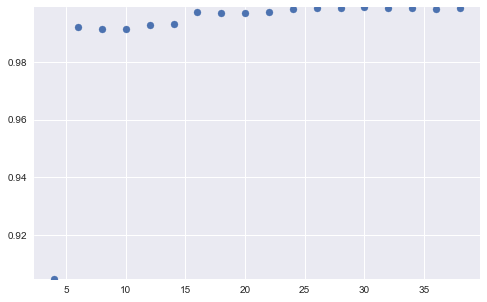

In [24]:
# Taux de prédiction
plt.figure(figsize=(8, 5))
plt.scatter(index, accur)
axes = plt.gca()
ymin, ymax = min(accur), max(accur)
axes.set_ylim([ymin,ymax])
plt.legend(loc='best', label="accuracy")
plt.show()